## Figures

Make figures for the markov motion correction project

In [154]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
baseDir = '/home/jenna/Research/CHP-PIRC/markov-movement-correction/0003_MR1_18991230_000000EP2DBOLDLINCONNECTIVITYs004a001/'

## Defining the Color Palette

Use seaborn to define the color palette for all figure generating functions

In [3]:
def defineColorPalette():
    """
    Use the seaborn library to define a better looking color palette.
    
    Currently takes no inputs, but that might change as I make more
    palettes
    
    Returns:
    - palette: the seaborn palette defined
    """
    # try using the xkcd_rgb colors
    # want 6 colors
    colors = ['blue', 'cherry red', 'golden yellow', 'vibrant green', 'violet', 'pumpkin orange']
    palette = sns.xkcd_palette(colors)
    
    return palette

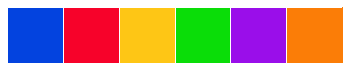

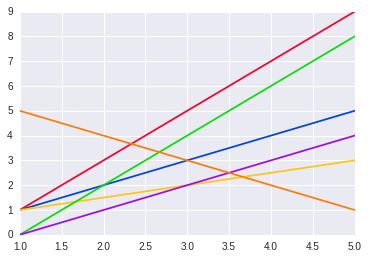

In [4]:
palette = defineColorPalette()
sns.palplot(palette)

# test plot
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]
y3 = [1, 1.5, 2, 2.5, 3]
y4 = [0, 2, 4, 6, 8]
y5 = [0, 1, 2, 3, 4]
y6 = [5, 4, 3, 2, 1]

fig = plt.figure()
sns.set_palette(palette)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.show()

## Similarity Metrics for Registration

- Correlation Ratio
- Mutual Information

plotTimeseriesSimilarities(): plot the signal comparing each timepoint to the first one in the temporal image

plotCorrelationMatrix(): read the correlation matrix from a csv file and plot it

plotCorrelationMatrices2(): read correlation matrics from 2 csv files and plot them

plotCorrelationMatrices4(): read correlation matrices from 4 csv files and plot them

plot


In [5]:
def plotTimeseriesSimilarities(timepoints, preReg, 
                               hmm, stackingHmm, signal4,
                               title='', ylabel='Similarity Metric',
                               simLabels=[], outFn=''):
    """
    Plot the similarity metric for each time point image to the
    template image for pre and post registration.
    
    The metrics are calculated using Raf's similarity.sh script.
    (Uses flirt)
    
    Inputs:
    - timepoints: the timepoints in the image
    - preReg: alignment of the images before registration
    - hmm: alignment of the images after HMM movement correction
    - stackingHmm: alignment of the images post stacking HMM 
                   movement correction
    - title: title for the graph
    - labels: the labels for the different signals
    - outFn: filename for the output (optional, leave empty if you
             don't want to save)
    
    Effects:
    - builds a graph that shows the similarities of each timepoint 
      image to the template image
    """
    sns.set_style("white")
    fig = plt.figure()
    
    # set the palette
    palette = defineColorPalette()
    sns.set_palette(palette)
    
    # put signals on graph
    print(simLabels)
    l1, = plt.plot(timepoints, preReg, label=simLabels[0])
    l2, = plt.plot(timepoints, hmm, label=simLabels[1])
    l3, = plt.plot(timepoints, stackingHmm, label=simLabels[2])
    l4, = plt.plot(timepoints, signal4, label=simLabels[3])
    
    # put legend on graph
    plt.legend(handles=[l1, l2, l3, l4], loc=2)
    
    plt.title(title)
    plt.xlabel('Timepoints')
    plt.ylabel(ylabel)
    
    plt.show()

    # saving the plot as an image
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight')

In [144]:
def plotCorrelationMatrice(fn, title="Cross Correlation Matrix",):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrix
    """
          
    # new figure
    fig = plt.figure()
    
    # subplot 1
    # load the matrix
    mat = np.loadtxt(open(fn, 'r'), delimiter=',')
    ax = fig.add_subplot(221)
    cax = ax.matshow(mat, cmap=plt.cm.plasma_r) # plasma_r looks cool, gist_heat_r is good
    ax.set_title(title)
    
    fig.colorbar(cax)
    
    plt.show()
    
def plotCorrelationMatrices2(fn1, fn2,
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix"):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')

    # calculate the vmin and vmax
    minVal = np.min(mat1.min(), mat2.min())
    maxVal = np.max(mat1.max(), mat2.max())
          
    # new figure
    fig = plt.figure()
    
    # subplot 1
    ax1 = fig.add_subplot(121)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(122)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax2.set_title(title2)
    
    
    # add the colorbar
    fig.colorbar(cax1, ax=[ax1, ax2])

    plt.show()
    
    

def plotCorrelationMatrices4(fn1, fn2, fn3, fn4, 
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix",
                          title3="Cross Correlation Matrix",
                          title4="Cross Correlation Matrix"):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    mat4 = np.loadtxt(open(fn4, 'r'), delimiter=',')

    # calculate the vmin and vmax
    minVal = np.min([mat1.min(), mat2.min(), mat3.min(), mat4.min()])
    maxVal = np.max([mat1.max(), mat2.max(), mat3.max(), mat4.max()])
          
    # new figure
    fig = plt.figure()
    
    # subplot 1
    ax1 = fig.add_subplot(221)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(222)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax2.set_title(title2)
    
    # subplot 3
    ax3 = fig.add_subplot(223)
    cax3 = ax3.matshow(mat3, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax3.set_title(title3)
    
    # subplot 4
    ax4 = fig.add_subplot(224)
    cax4 = ax4.matshow(mat4, cmap=plt.cm.plasma_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax4.set_title(title4)
    
    # add the colorbar
    fig.colorbar(cax1, ax=[ax1, ax2, ax3, ax4])
    
    plt.show()
    

In [155]:
def calculateAvgCrossCorrelation(fn):
    """
    Given a filename, read in the cross correlation file for the image.
    Average the cross correlation value for the entire image.
    
    Inputs:
    - fn: the filename to load
    
    Returns:
    - avgCross: the average cross correlation
    """
    # load file
    mat = np.loadtxt(open(fn, 'r'), delimiter=',')
    
    # return the average
    avgCross = mat.mean()
    return avgCross

## Testing Correlation Matrix Plotting

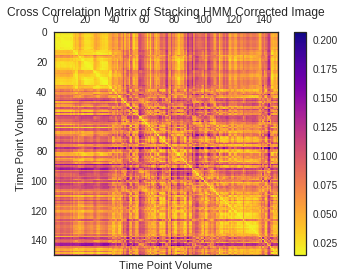

In [148]:
plotCorrelationMatrix("correlationMatrix-timepoints.csv",
                      title="Cross Correlation Matrix of Stacking HMM Corrected Image")

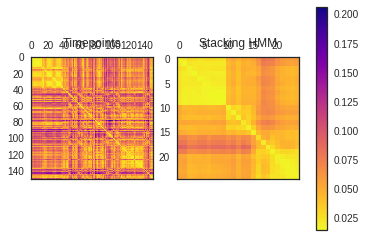

In [146]:
plotCorrelationMatrices2("correlationMatrix-timepoints.csv",
                        "correlationMatrix-stackingHmm.csv",
                        title1="Timepoints", title2="Stacking HMM")

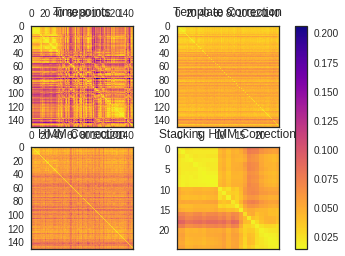

Average cross correlation for each version of motion correction:
  None:                     0.0727204336178
  First Timepoint Matching: 0.0480294174178
  HMM:                      0.0645198718622
 *Stacking HMM:             0.04567651264


In [157]:
plotCorrelationMatrices4("correlationMatrix-timepoints.csv",
                         "correlationMatrix-firstTimepoint.csv",
                         "correlationMatrix-hmm.csv",
                         "correlationMatrix-stackingHmm.csv",
                         title1="Timepoints", title2="Template Correction",
                         title3="HMM Correction", title4="Stacking HMM Correction")

print("Average cross correlation for each version of motion correction:")
print("  None:                    ", calculateAvgCrossCorrelation("correlationMatrix-timepoints.csv"))
print("  First Timepoint Matching:", calculateAvgCrossCorrelation("correlationMatrix-firstTimepoint.csv"))
print("  HMM:                     ", calculateAvgCrossCorrelation("correlationMatrix-hmm.csv"))
print(" *Stacking HMM:            ", calculateAvgCrossCorrelation("correlationMatrix-stackingHmm.csv"))

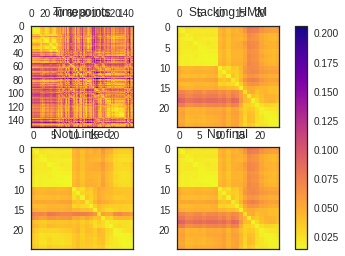

Average cross correlation for each version of motion correction:
  None:                     0.0727204336178
  Stacking HMM:             0.04567651264
  Stacking HMM Not Linked:  0.03701692032
 *Stacking HMM No Final:    0.04567651264


In [158]:
plotCorrelationMatrices4("correlationMatrix-timepoints.csv",
                         "correlationMatrix-stackingHmm.csv",
                         "correlationMatrix-stackingHmmNotLinked.csv",
                         "correlationMatrix-stackingHmmNoFinal.csv",
                         title1="Timepoints", title2="Stacking HMM",
                         title3="Not Linked", title4="No final")

print("Average cross correlation for each version of motion correction:")
print("  None:                    ", calculateAvgCrossCorrelation("correlationMatrix-timepoints.csv"))
print("  Stacking HMM:            ", calculateAvgCrossCorrelation("correlationMatrix-stackingHmm.csv"))
print("  Stacking HMM Not Linked: ", calculateAvgCrossCorrelation("correlationMatrix-stackingHmmNotLinked.csv"))
print(" *Stacking HMM No Final:   ", calculateAvgCrossCorrelation("correlationMatrix-stackingHmmNoFinal.csv"))

In [9]:
# load the data
timepoints_df = pd.read_csv(baseDir+'similarities_preregistration.csv')
stackingHmm_df = pd.read_csv(baseDir+'similarities_stacking_hmm.csv')
stackingHmmNonLinked_df = pd.read_csv(baseDir+'similarities_stacking_hmm_not_linked.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

regNA_CorrRatio = stackingHmm_df[list(stackingHmm_df)[1]].tolist()
regNA_MI = stackingHmm_df[list(stackingHmm_df)[2]].tolist()

marNA_CorrRatio = stackingHmmNonLinked_df[list(stackingHmmNonLinked_df)[1]].tolist()
marNA_MI = stackingHmmNonLinked_df[list(stackingHmmNonLinked_df)[2]].tolist()

# set up the labels
simLabels = ['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']

In [10]:
print(len(time))
print(len(marNA_MI))

150
150


['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']


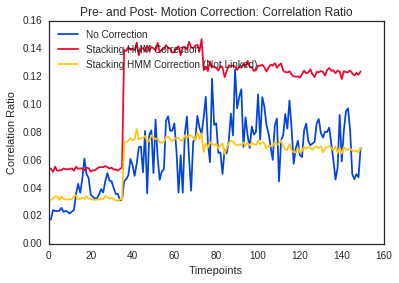

In [11]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_CorrRatio, regNA_CorrRatio, 
                           marNA_CorrRatio,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']


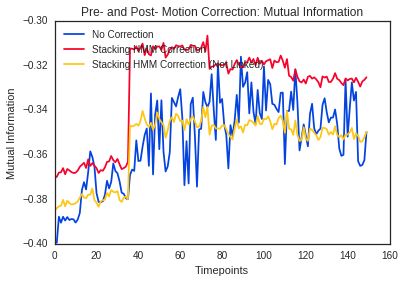

In [12]:
plotTimeseriesSimilarities(time, preReg_MI, regNA_MI, 
                           marNA_MI,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)

In [32]:
# load the data
timepoints_df = pd.read_csv(baseDir+'similarities_preregistration.csv')
hmm_df = pd.read_csv(baseDir+'similarities_hmm.csv')
prealign_df = pd.read_csv(baseDir+'similarities_prealigned.csv')
prealignHmm_df = pd.read_csv(baseDir+'similarities_prealign_hmm.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

hmm_CorrRatio = hmm_df[list(hmm_df)[1]].tolist()
hmm_MI = hmm_df[list(hmm_df)[2]].tolist()

prealign_CorrRatio = prealign_df[list(prealign_df)[1]].tolist()
prealign_MI = prealign_df[list(prealign_df)[2]].tolist()

prealignHmm_CorrRatio = prealignHmm_df[list(prealignHmm_df)[1]].tolist()
prealignHmm_MI = prealignHmm_df[list(prealignHmm_df)[2]].tolist()

# set up the labels
simLabels = ['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']

['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']


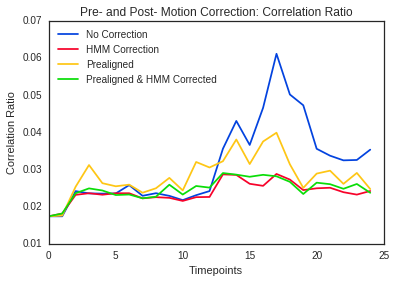

In [33]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_CorrRatio, hmm_CorrRatio, 
                           prealign_CorrRatio, prealignHmm_CorrRatio,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']


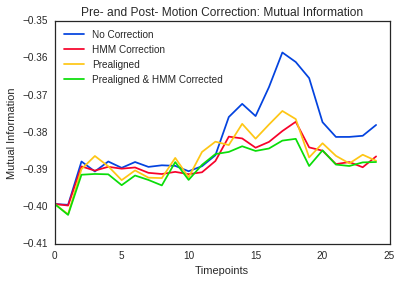

In [34]:
# plot the data - mutual information
plotTimeseriesSimilarities(time, preReg_MI, hmm_MI, 
                           prealign_MI, prealignHmm_MI,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)

### Figures from Testing

When I changed the transform file output from .h5 to .mat+.nii.gz, I found out that the registration sometimes performs an Affine transformation before the SyN. So I ran the hmm registration using the _0.nii.gz file and then using the _1.nii.gz file. Here's the metrics of the results

In [47]:
# load the data
timepoints_df = pd.read_csv(baseDir+'testing_similarities_preregistration.csv')
df0 = pd.read_csv(baseDir+'testing_similarities_finalTransform.csv')
df1 = pd.read_csv(baseDir+'testing_similarities_noFinalTransform.csv')
df2 = pd.read_csv(baseDir+'testing_similarities_notLinked.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

corrRatio0 = df0[list(df0)[1]].tolist()
mi0 = df0[list(df0)[2]].tolist()

corrRatio1 = df1[list(df1)[1]].tolist()
mi1 = df1[list(df1)[2]].tolist()

corrRatio2 = df2[list(df2)[1]].tolist()
mi2 = df2[list(df2)[2]].tolist()

placeholder = [0]*25
# set up the labels
simLabels = ['No Correction', 'HMM w/ Final', 'HMM w/o Final', 'HMM Not Linked']

len(time[:25])

25

['No Correction', 'HMM w/ Final', 'HMM w/o Final', 'HMM Not Linked']


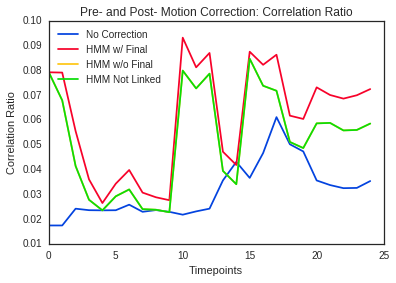

In [48]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time[:25], preReg_CorrRatio[:25], corrRatio0, 
                           corrRatio1, corrRatio1,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'HMM w/ Final', 'HMM w/o Final', 'HMM Not Linked']


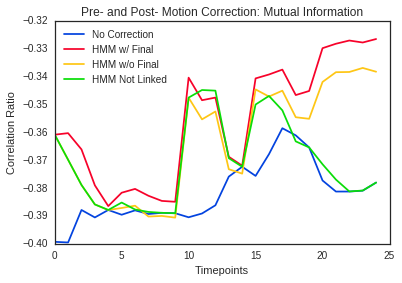

In [49]:
# plot the data - mutual information
plotTimeseriesSimilarities(time[:25], preReg_MI[:25], mi0, 
                           mi1, mi2,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

### Stacking HMM Test

In [6]:
# load the data
timepoints_df = pd.read_csv(baseDir+'testing_similarities_preregistration.csv')
df0 = pd.read_csv(baseDir+'testing_similarities_hmm.csv')
# df1 = pd.read_csv(baseDir+'testing_similarities_stackinghmm.csv')


# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

corrRatio0 = df0[list(df0)[1]].tolist()
mi0 = df0[list(df0)[2]].tolist()

# corrRatio1 = df1[list(df1)[1]].tolist()
# mi1 = df1[list(df1)[2]].tolist()

placeholder = [0]*25
# set up the labels
simLabels = ['No Correction', 'HMM', "", ""] #, 'Stacking HMM', ""]

len(time[:25])

25

['No Correction', 'HMM', '', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f5d3d07dcd0> has a label of u'_line2' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f5d3d088350> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


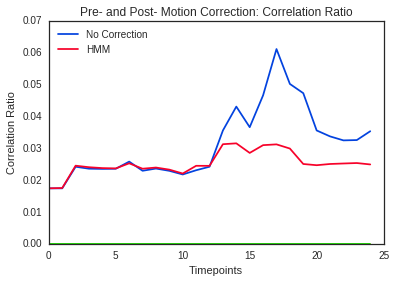

In [7]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time[:25], preReg_CorrRatio[:25], corrRatio0[:25], 
                           placeholder, placeholder,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'HMM', '', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f5d3ce1cad0> has a label of u'_line2' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f5d3ce29150> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


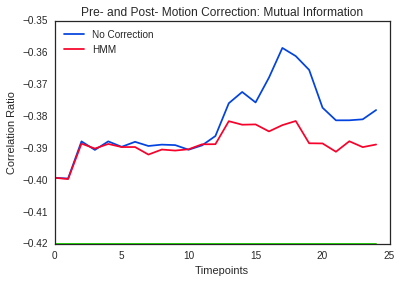

In [9]:
# plot the data - mutual information
plotTimeseriesSimilarities(time[:25], preReg_MI[:25], mi0[:25], 
                           [-.42]*25, [-.42]*25,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

### Poster Figures

Comparision of 4 different types of motion correction

In [30]:
# load the data
timepoints_df = pd.read_csv(baseDir+'testing_similarities_preregistration.csv')
first_df = pd.read_csv(baseDir+'testing_similarities_first.csv')
hmm_df = pd.read_csv(baseDir+'testing_similarities_hmm.csv')
sequential_df = pd.read_csv(baseDir+'testing_similarities_sequential.csv')
# template_df = pd.read_csv(baseDir+'testing_similarities_template.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_cr = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_mi = timepoints_df[list(timepoints_df)[2]].tolist()

first_cr = first_df[list(first_df)[1]].tolist()
first_mi = first_df[list(first_df)[2]].tolist()

hmm_cr = hmm_df[list(hmm_df)[1]].tolist()
hmm_mi = hmm_df[list(hmm_df)[2]].tolist()

sequential_cr = sequential_df[list(sequential_df)[1]].tolist()
sequential_mi = sequential_df[list(sequential_df)[2]].tolist()

# template_cr = template_df[list(template_df)[1]].tolist()
# template_mi = template_df[list(template_df)[2]].tolist()

# set up the labels
# simLabels = ['No Correction', 'First Image Matching', 'Template Matching', 'Sequential Correction', 'HMM']
simLabels = ['No Correction', 'First Image Matching', 'Sequential Correction', 'HMM']

['No Correction', 'First Image Matching', 'Sequential Correction', 'HMM']


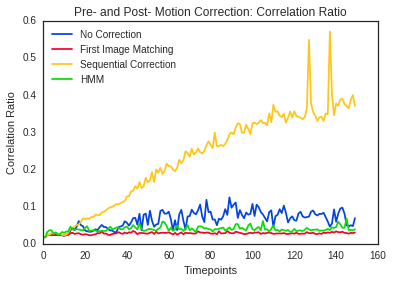

In [31]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_cr, first_cr, 
                           sequential_cr, hmm_cr,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'First Image Matching', 'Sequential Correction', 'HMM']


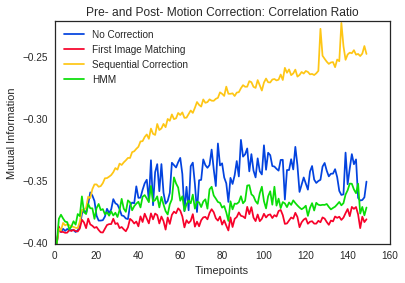

In [33]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_mi, first_mi, 
                           sequential_mi, hmm_mi,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)